In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt   

In [2]:
# !pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.7-cp312-cp312-win_amd64.whl.metadata (6.4 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.0 MB 3.4 MB/s eta 0:00:03
   ------ --------------------------------- 1.3/8.0 MB 3.5 MB/s eta 0:00:02
   ---------- ----------------------------- 2.1/8.0 MB 3.8 MB/s eta 0:00:02
   -------------- ------------------------- 2.9/8.0 MB 3.5 MB/s eta 0:00:02
   ---------------- ----------------------- 3.4/8.0 MB 3.5 MB/s eta 0:00:02
   -------------------- ------------------- 4.2/8.0 MB 3.3 MB/s eta 0:00:02
   --------------------------- ------------ 5.5/8.0 MB 3.7 MB/s eta 0:00:01
   ------------------------------------- -- 7.6/8.0 MB 4.5 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 4.6 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB

In [4]:
items = [
    "COD NUMBER",
    "Detail",
    "Detail on NON UIP",
    "Biopsy",
    "Pathology pattern UIP, probable or CHP",
    "Treatment",
    "Pathology pattern",
    "Extras AP",
    "Diagnosis after Biopsy",
    "Type of telomeric extrapulmonary affectation",
    "Extra",
    "Type of neoplasia",
    "Liver abnormality before diagnosis",
    "Hematological abnormality before diagnosis",
    "Type of liver abnormality",
    "Necessity of transplantation",
    "Cause of death",
    "Identified Infection",
    "Date of death",
    "Pedigree",
    "FamilialvsSporadic",
    "Mutation Type",
    "Severity of telomere shortening - Transform 4",
    "ProgressiveDisease"
]

In [5]:
# Load your dataset
df = pd.read_csv("../../data/output.csv")
df = df.drop(items, axis=1)

print(df.shape)

(222, 53)


# Tractament de Target values

In [7]:
df["Death"] = df["Death"].fillna("No")
print(df["Death"].unique())

# mapear yes y no a 1 y 0
df["Death"] = df["Death"].map({"Yes": 1, "No": 0})
print(df["Death"].unique())

[1 0]
[nan]


In [8]:
df["Progressive disease"] = df["Progressive disease"].fillna(0)
df["Progressive disease"] = df["Progressive disease"].astype(int)
print(df["Progressive disease"].unique())

[1 0]


(222, 53)


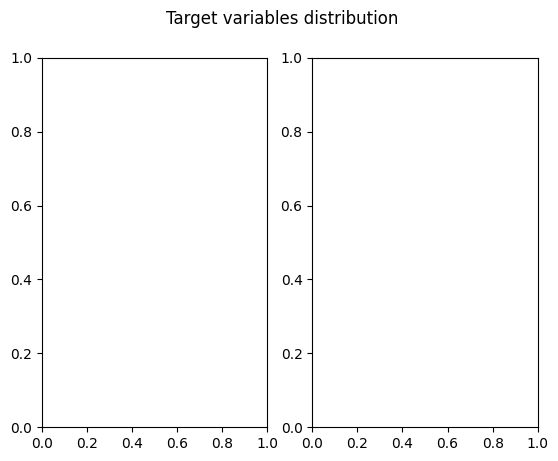

In [10]:
fig, axs = plt.subplots(1, 2)
fig.suptitle('Target variables distribution')
# axs[0].hist(df["Death"])
# axs[1].hist(df["Progressive disease"])
# plt.show()

print(df.shape)

# Mapeados

In [11]:
# imprimir los tipos que sean object
for column in df.columns:
    if df[column].dtype == "object":
        print(column)
        print(df[column].unique())
        print('')

Sex
['Male' 'Female']

Binary diagnosis
['No IPF' 'IPF']

Radiological Pattern
['UIP' 'Probable UIP' 'Non UIP' 'Indeterminate UIP' nan]

Pathology Pattern Binary
[nan 'NON UIP' 'UIP']

Hematologic Disease
['No' 'Thalassemia' 'Yes' 'Polycytemia' 'Linfoma folicular'
 'Sd mielodisplasico' 'Thalassemia minor' 'ANAA 1:80' nan 'FR +'
 'ANA 1:80']

Liver abnormality
['Yes' 'No' nan]

Liver disease
['No' 'Liver cirrhosis' 'Fatty liver disease' 'Fatty liver disease (2)'
 'esteatosis hepática, + anti-HBc' 'HCV chronic liver disease'
 'Chronic alcohol liver disease' 'Chronic alcohol liver disease (2)'
 'Hepatic sarcoidosis with portal hypertension' nan 'Liver disease']

Transplantation date
['No transplantation' '2020-12-22 00:00:00' '2010-05-13 00:00:00'
 '2014-12-29 00:00:00' '2016-08-08 00:00:00' '2015-06-05 00:00:00'
 '2018-01-10 00:00:00' '2015-02-15 00:00:00' '2018-06-27 00:00:00'
 '2017-06-07 00:00:00' '2018-11-02 00:00:00' '2013-02-08 00:00:00'
 '2015-11-27 00:00:00' nan '2019-12-22 00:00

In [12]:
# Mapeamos Sex, Binary Diagnosis, liver abnormality
df["Sex"] = df["Sex"].map({"Male": 1, "Female": 0})
df["Binary diagnosis"] = df["Binary diagnosis"].map({"IPF": 1, "No IPF": 0})
df["Liver abnormality"] = df["Liver abnormality"].map({"Yes": 1, "No": 0})




In [13]:
# imprimir los tipos que sean object
for column in df.columns:
    if df[column].dtype == "object":
        print(column)
        print(df[column].unique())
        print('')

Radiological Pattern
['UIP' 'Probable UIP' 'Non UIP' 'Indeterminate UIP' nan]

Pathology Pattern Binary
[nan 'NON UIP' 'UIP']

Hematologic Disease
['No' 'Thalassemia' 'Yes' 'Polycytemia' 'Linfoma folicular'
 'Sd mielodisplasico' 'Thalassemia minor' 'ANAA 1:80' nan 'FR +'
 'ANA 1:80']

Liver disease
['No' 'Liver cirrhosis' 'Fatty liver disease' 'Fatty liver disease (2)'
 'esteatosis hepática, + anti-HBc' 'HCV chronic liver disease'
 'Chronic alcohol liver disease' 'Chronic alcohol liver disease (2)'
 'Hepatic sarcoidosis with portal hypertension' nan 'Liver disease']

Transplantation date
['No transplantation' '2020-12-22 00:00:00' '2010-05-13 00:00:00'
 '2014-12-29 00:00:00' '2016-08-08 00:00:00' '2015-06-05 00:00:00'
 '2018-01-10 00:00:00' '2015-02-15 00:00:00' '2018-06-27 00:00:00'
 '2017-06-07 00:00:00' '2018-11-02 00:00:00' '2013-02-08 00:00:00'
 '2015-11-27 00:00:00' nan '2019-12-22 00:00:00' '2019-08-20 00:00:00'
 '2019-01-20 00:00:00' '2015-01-10 00:00:00' '2020-02-02 00:00:00'


## fusion patterns

In [14]:
# para cada instancia del dataset, si la columna Radiological Pattern es igual a ['UIP' 'Probable UIP', 'Indeterminate UIP'] entonces se le asigna un ['UIP'] a la columna Pathology Pattern Binary sino se le asigna un ['NON UIP'] a Pathology Pattern Binary
df["Pathology Pattern Binary"] = df["Radiological Pattern"].apply(lambda x: "UIP" if x in ['UIP', 'Probable UIP', 'Indeterminate UIP'] else "NON UIP")

# borramos la columna Radiological Pattern ahora que ya no la necesitamos
df = df.drop("Radiological Pattern", axis=1)

# Mapeamos Pathology Pattern Binary a 1 y 0
df["Pathology Pattern Binary"] = df["Pathology Pattern Binary"].map({"UIP": 1, "NON UIP": 0})


In [15]:
# imprimir los tipos que sean object
for column in df.columns:
    if df[column].dtype == "object":
        print(column)
        print(df[column].unique())
        print('')

Hematologic Disease
['No' 'Thalassemia' 'Yes' 'Polycytemia' 'Linfoma folicular'
 'Sd mielodisplasico' 'Thalassemia minor' 'ANAA 1:80' nan 'FR +'
 'ANA 1:80']

Liver disease
['No' 'Liver cirrhosis' 'Fatty liver disease' 'Fatty liver disease (2)'
 'esteatosis hepática, + anti-HBc' 'HCV chronic liver disease'
 'Chronic alcohol liver disease' 'Chronic alcohol liver disease (2)'
 'Hepatic sarcoidosis with portal hypertension' nan 'Liver disease']

Transplantation date
['No transplantation' '2020-12-22 00:00:00' '2010-05-13 00:00:00'
 '2014-12-29 00:00:00' '2016-08-08 00:00:00' '2015-06-05 00:00:00'
 '2018-01-10 00:00:00' '2015-02-15 00:00:00' '2018-06-27 00:00:00'
 '2017-06-07 00:00:00' '2018-11-02 00:00:00' '2013-02-08 00:00:00'
 '2015-11-27 00:00:00' nan '2019-12-22 00:00:00' '2019-08-20 00:00:00'
 '2019-01-20 00:00:00' '2015-01-10 00:00:00' '2020-02-02 00:00:00'
 '2020-01-10 00:00:00' '2016-02-12 00:00:00' '2017-07-09 00:00:00'
 '2019-02-12 00:00:00']

Type of family history
['CPFE' 'Uns

Mapear multiclases a binarias

In [16]:
# cambiar columnas Hematologic Disease,Liver disease,Transplantation date, Type of family history a binarias

# hematologic desease quiero que sea 0 si es no y 1 si es cualquier otra cosa ['Thalassemia' 'Yes' 'Polycytemia' 'Linfoma folicular' 'Sd mielodisplasico' 'Thalassemia minor' 'ANAA 1:80' 'FR +' 'ANA 1:80']
df["Hematologic Disease"] = df["Hematologic Disease"].apply(lambda x: 0 if x == "No" or pd.isnull(x) else 1)

# lo mismo para Liver disease 
df["Liver disease"] = df["Liver disease"].apply(lambda x: 0 if x == "No" or pd.isnull(x) else 1)

# lo mismo para Transplantation date pero si es "No transplantation" o null entonces es 0 y si es cualquier otra cosa es 1
df["Transplantation date"] = df["Transplantation date"].apply(lambda x: 0 if x == "No transplantation" or pd.isnull(x) else 1)
df = df.rename(columns={"Transplantation date": "Transplantation"})

# lo mismo para Type of family history pero si es "No" o null entonces es 0 y si es cualquier otra cosa es 1
df["Type of family history"] = df["Type of family history"].apply(lambda x: 0 if x == "No history" or pd.isnull(x) else 1)


cambiar los tipos del dataset

In [17]:
# imprimir los tipos de cada columna
print(df.dtypes)

Sex                                       int64
Age at diagnosis                        float64
Binary diagnosis                          int64
Final diagnosis                           int64
TOBACCO                                   int64
Comorbidities                             int64
Pathology Pattern Binary                  int64
Multidsciplinary committee              float64
Pirfenidone                               int64
Nintedanib                                int64
Antifibrotic Drug                         int64
Prednisone                                int64
Mycophenolate                             int64
Extrapulmonary affectation              float64
Associated lung cancer                  float64
Other cancer                            float64
Blood count abnormality at diagnosis    float64
Anemia                                  float64
Thrombocytopenia                        float64
Thrombocytosis                          float64
Lymphocytosis                           

In [18]:
print(df.columns)

Index(['Sex', 'Age at diagnosis', 'Binary diagnosis', 'Final diagnosis',
       'TOBACCO', 'Comorbidities', 'Pathology Pattern Binary',
       'Multidsciplinary committee', 'Pirfenidone', 'Nintedanib',
       'Antifibrotic Drug', 'Prednisone', 'Mycophenolate',
       'Extrapulmonary affectation', 'Associated lung cancer', 'Other cancer',
       'Blood count abnormality at diagnosis', 'Anemia', 'Thrombocytopenia',
       'Thrombocytosis', 'Lymphocytosis', 'Lymphopenia', 'Neutrophilia',
       'Neutropenia', 'Leukocytosis', 'Leukopenia', 'Hematologic Disease',
       'Liver abnormality', 'LDH', 'ALT', 'AST', 'ALP', 'GGT', 'Transaminitis',
       'Cholestasis', 'Liver disease', 'FVC (L) at diagnosis',
       'FVC (%) at diagnosis', 'DLCO (%) at diagnosis',
       'FVC (L) 1 year after diagnosis', 'FVC (%) 1 year after diagnosis',
       'DLCO (%) 1 year after diagnosis', 'RadioWorsening2y',
       'Transplantation', 'Death', 'Type of family history',
       '1st degree relative', '2nd deg

In [19]:
# cambiar a Int las siguientes columnas 

to_int64 = ["Age at diagnosis",
    'Multidsciplinary committee',
    "Extrapulmonary affectation",
    "Associated lung cancer",
    "Other cancer",
    "Blood count abnormality at diagnosis",
    "Anemia",
    "Thrombocytopenia",
    "Thrombocytosis",
    "Lymphocytosis",
    "Lymphopenia",
    "Neutrophilia",
    "Neutropenia",
    "Leukocytosis",
    "Leukopenia",
    "Genetic mutation studied in patient",
    "Severity of telomere shortening",
    "RadioWorsening2y",
    "Progressive disease",
]

df[to_int64] = df[to_int64].astype('Int64', errors='ignore')




dataset transformado final

In [20]:
print(df.dtypes)

Sex                                       int64
Age at diagnosis                          Int64
Binary diagnosis                          int64
Final diagnosis                           int64
TOBACCO                                   int64
Comorbidities                             int64
Pathology Pattern Binary                  int64
Multidsciplinary committee                Int64
Pirfenidone                               int64
Nintedanib                                int64
Antifibrotic Drug                         int64
Prednisone                                int64
Mycophenolate                             int64
Extrapulmonary affectation                Int64
Associated lung cancer                    Int64
Other cancer                              Int64
Blood count abnormality at diagnosis      Int64
Anemia                                    Int64
Thrombocytopenia                          Int64
Thrombocytosis                            Int64
Lymphocytosis                           

In [21]:
# Let's explore the missing values in the dataset
# Lets print the percentage of missing values in each column order
l = df.isnull().mean() * 100

# Lets order the columns by the percentage of missing values and if they are float64
l = l.sort_values(ascending=False)
more_missing = []
less_missing = []
fake_missing = []
true_missing = []
for i in l.index:

    if l[i] > 0 and (df[i].dtype == "Int64" or df[i].dtype == "int64") and i != "Age at diagnosis":
        fake_missing.append(i)
        print(f"FAKE MISS {i}: {l[i]}%")
    elif l[i] > 0 and (df[i].dtype == "float64") or i == "Age at diagnosis":
        true_missing.append(i)
        print(f" TRUE MISS {i}: {l[i]}%")



 TRUE MISS Death: 100.0%
FAKE MISS Severity of telomere shortening: 31.53153153153153%
FAKE MISS Genetic mutation studied in patient: 9.00900900900901%
 TRUE MISS DLCO (%) 1 year after diagnosis: 2.7027027027027026%
FAKE MISS Extrapulmonary affectation: 1.8018018018018018%
FAKE MISS Blood count abnormality at diagnosis: 1.8018018018018018%
 TRUE MISS FVC (%) 1 year after diagnosis: 1.8018018018018018%
 TRUE MISS FVC (L) 1 year after diagnosis: 1.8018018018018018%
FAKE MISS Anemia: 1.3513513513513513%
FAKE MISS Leukopenia: 1.3513513513513513%
FAKE MISS Other cancer: 1.3513513513513513%
FAKE MISS Associated lung cancer: 1.3513513513513513%
FAKE MISS Leukocytosis: 0.9009009009009009%
FAKE MISS Thrombocytopenia: 0.9009009009009009%
 TRUE MISS DLCO (%) at diagnosis: 0.9009009009009009%
FAKE MISS RadioWorsening2y: 0.9009009009009009%
 TRUE MISS FVC (%) at diagnosis: 0.9009009009009009%
 TRUE MISS Liver abnormality: 0.9009009009009009%
 TRUE MISS FVC (L) at diagnosis: 0.9009009009009009%
FAKE

In [22]:
print(f"FAKE MISSING: {fake_missing}")
print(f"TRUE MISSING: {true_missing}")

FAKE MISSING: ['Severity of telomere shortening', 'Genetic mutation studied in patient', 'Extrapulmonary affectation', 'Blood count abnormality at diagnosis', 'Anemia', 'Leukopenia', 'Other cancer', 'Associated lung cancer', 'Leukocytosis', 'Thrombocytopenia', 'RadioWorsening2y', 'Multidsciplinary committee', 'Lymphopenia', 'Neutrophilia', 'Neutropenia', 'Thrombocytosis', 'Lymphocytosis']
TRUE MISSING: ['Death', 'DLCO (%) 1 year after diagnosis', 'FVC (%) 1 year after diagnosis', 'FVC (L) 1 year after diagnosis', 'DLCO (%) at diagnosis', 'FVC (%) at diagnosis', 'Liver abnormality', 'FVC (L) at diagnosis', 'Age at diagnosis']


In [23]:
for i in fake_missing:
    df[i] = df[i].fillna(0)

In [24]:
for i in fake_missing:
    if -9 in df[i].unique():
        df[i] = df[i].replace(-9, pd.NA)
        true_missing.append(i)

In [25]:
# Let's explore the missing values in the dataset
# Lets print the percentage of missing values in each column order
l = df.isnull().mean() * 100
l = l.sort_values(ascending=False)

for i in l.index:
    if l[i] > 0:
        print(f" {i}: {l[i]}%")



 Death: 100.0%
 DLCO (%) 1 year after diagnosis: 2.7027027027027026%
 FVC (%) 1 year after diagnosis: 1.8018018018018018%
 FVC (L) 1 year after diagnosis: 1.8018018018018018%
 DLCO (%) at diagnosis: 0.9009009009009009%
 FVC (%) at diagnosis: 0.9009009009009009%
 Severity of telomere shortening: 0.9009009009009009%
 Liver abnormality: 0.9009009009009009%
 FVC (L) at diagnosis: 0.9009009009009009%
 Age at diagnosis: 0.45045045045045046%
 Genetic mutation studied in patient: 0.45045045045045046%


In [26]:
print(f"TRUE MISSING: {true_missing}")

TRUE MISSING: ['Death', 'DLCO (%) 1 year after diagnosis', 'FVC (%) 1 year after diagnosis', 'FVC (L) 1 year after diagnosis', 'DLCO (%) at diagnosis', 'FVC (%) at diagnosis', 'Liver abnormality', 'FVC (L) at diagnosis', 'Age at diagnosis', 'Severity of telomere shortening', 'Genetic mutation studied in patient']


In [27]:
X = df.drop(columns=["Death", "Progressive disease"]) # Features
y = df[["Death", "Progressive disease"]]  # Target variable

In [28]:
for i in range(1000):
    #iterar random_state hasta que no haya missings en x_test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=i)
    if X_test.isnull().sum().sum() == 0:
        print(f"Random state: {i}")
        break

    

Random state: 11


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=i)

# comprobamos que no haya missings en x_test
print(X_test.isnull().sum().sum())


0


In [32]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer  # Necesario para habilitar MICE
from sklearn.impute import IterativeImputer
from scipy.stats import mode

# Detectar variables binarias (0 y 1) y numéricas
binary_vars = [col for col in X_train.columns if set(X_train[col].dropna().unique()).issubset({0, 1})]
numeric_vars = [col for col in X_train.columns if col not in binary_vars]

# 1. Imputación de las variables binarias con la moda
for col in binary_vars:
    # Calcular la moda excluyendo valores nulos
    moda = mode(X_train[col].dropna())[0][0]
    # Imputar valores faltantes con la moda
    X_train[col].fillna(moda, inplace=True)

# 2. Imputación de las variables numéricas con MICE
mice_imputer = IterativeImputer(random_state=42)
X_train[numeric_vars] = mice_imputer.fit_transform(X_train[numeric_vars])

# 3. Redondear y convertir a enteros columnas específicas
columns_to_round = ['Age at diagnosis', 'Final diagnosis', 'TOBACCO', 'Severity of telomere shortening']
for col in columns_to_round:
    if col in X_train.columns:
        X_train[col] = X_train[col].round().astype(int)

# Resultado
print("Imputación completada y valores redondeados.")


IndexError: invalid index to scalar variable.

In [924]:
X_train = pd.DataFrame(X_train, columns=X.columns)

In [925]:
for col in X_train.columns:
    if pd.api.types.is_integer_dtype(X_train[col]):
        X_train[col] = X_train[col].astype('int64')
        X_test[col] = X_test[col].astype('int64')

In [926]:
X_train.dtypes

Sex                                       int64
Age at diagnosis                          int64
Binary diagnosis                          int64
Final diagnosis                           int64
TOBACCO                                   int64
Comorbidities                             int64
Pathology Pattern Binary                  int64
Multidsciplinary committee                int64
Pirfenidone                               int64
Nintedanib                                int64
Antifibrotic Drug                         int64
Prednisone                                int64
Mycophenolate                             int64
Extrapulmonary affectation                int64
Associated lung cancer                    int64
Other cancer                              int64
Blood count abnormality at diagnosis      int64
Anemia                                    int64
Thrombocytopenia                          int64
Thrombocytosis                            int64
Lymphocytosis                           

In [927]:
X_test.dtypes

Sex                                       int64
Age at diagnosis                          int64
Binary diagnosis                          int64
Final diagnosis                           int64
TOBACCO                                   int64
Comorbidities                             int64
Pathology Pattern Binary                  int64
Multidsciplinary committee                int64
Pirfenidone                               int64
Nintedanib                                int64
Antifibrotic Drug                         int64
Prednisone                                int64
Mycophenolate                             int64
Extrapulmonary affectation                int64
Associated lung cancer                    int64
Other cancer                              int64
Blood count abnormality at diagnosis      int64
Anemia                                    int64
Thrombocytopenia                          int64
Thrombocytosis                            int64
Lymphocytosis                           

In [928]:
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

# comprobamos que no haya missings en train_df y test_df
print(train_df.isnull().sum().sum())
print(test_df.isnull().sum().sum())

0
0


In [929]:
train_df.to_csv("../../data/train.csv", index=False)
test_df.to_csv("../../data/test.csv", index=False)

print("The train.csv and test.csv files have been created successfully, including both target columns.")

The train.csv and test.csv files have been created successfully, including both target columns.
